In [1]:
# Stock Price Forcasting System
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv(r"C:\Users\DELL\Downloads\Google_Stock_Price_Train.csv")

# More the time stamp, more will be the accuracy but the speed will me slow
x = df['Open']
x = np.array(x).reshape((len(x),1)) # Reshape because can't apply scaling on 1d array

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x) # Error because data is in 1d form
# X is in 2d form

x_stock = []
y_stock = []
# Converting our open price column into specified format before training

for i in range(30,len(x)):
    x_stock.append(x[i-30:i])
    # x_stock is appended with 2d array
    y_stock.append([x[i]])

x_stock=np.array(x_stock)
# x_stock is 3d array
y_stock=np.array(y_stock)
# y_stock is 3d array

print(x_stock)
print(y_stock)

# When we are working on stock price prediction make data scaled 


[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.0440695 ]
  [0.04648783]
  [0.04745517]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.04648783]
  [0.04745517]
  [0.04873875]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.04745517]
  [0.04873875]
  [0.03936305]]

 ...

 [[0.88637547]
  [0.87032145]
  [0.88563137]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.87032145]
  [0.88563137]
  [0.90743359]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.88563137]
  [0.90743359]
  [0.91571173]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[[[0.04873875]]

 [[0.03936305]]

 [[0.04137213]]

 ...

 [[0.95725128]]

 [[0.93796041]]

 [[0.93688146]]]


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0423
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0015
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0012
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0012
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0013
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0014
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0011
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0012
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 9.1445e-04
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 8.6609e-04
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 9.0879e-04
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 7.0280e-04
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 8.9569e-04
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 7.7097e-04
Epoch 15/50
123/123

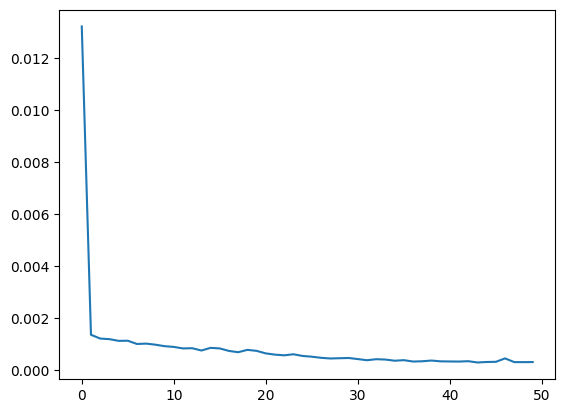

In [2]:
# Training 
# Before making LSTM model our data shape should be like this
# (Row,timestamp,feature)

# Rows means number of samples
# Timestamp -> no of days require to predict one stock
# Features -> number of indioendent features using predict (1)

import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
lstm = Sequential()
lstm.add(LSTM(units=50,input_shape=(x_stock.shape[1],x_stock.shape[2]),return_sequences=True))
# When return_sequences is False then only there will be one output
# So when we are using stacked LSTM then pass this parameter as True
# By which second lstm layer will also get data in 3d form
lstm.add(Dropout(0,2))
lstm.add(LSTM(units=20))
lstm.add(Dense(units=1,activation='relu'))
lstm.compile(optimizer='adam',loss='mean_squared_error')
history = lstm.fit(x_stock,y_stock,batch_size=10,epochs=50)

plt.plot(history.history['loss'])
plt.show()

In [14]:
y_pred = lstm.predict(x_stock)
y_pred
# In sklearn we have a feature of inverse transformation
# Inverse transformation is concept of making orginal form of data as was before transformation
y_pred = scaler.inverse_transform(y_pred)
y_pred

# NOTE: While inverse transformation no of dimensions should be same as was in original data

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[306.23227],
       [306.69812],
       [304.78265],
       ...,
       [792.14746],
       [795.4354 ],
       [784.5091 ]], dtype=float32)

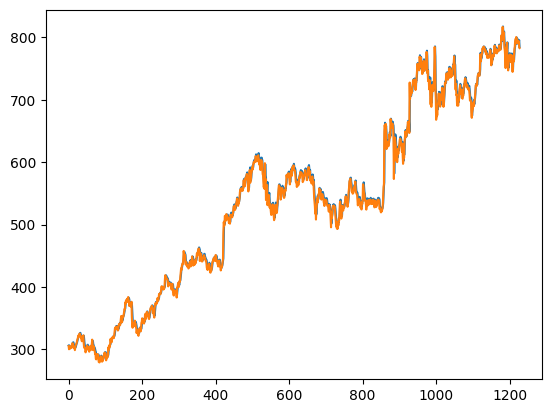

In [20]:
y_stock_2d = y_stock.reshape(-1, y_stock.shape[-1])
y_stock = scaler.inverse_transform(y_stock_2d)
y_stock = y_stock.reshape(y_pred.shape)

plt.plot(y_pred)
plt.plot(y_stock)
plt.show()

In [25]:
last_30_day = x[-30:]
print(last_30_day)
last_30_day = last_30_day.reshape(1, 30, 1)

# Predict
y_pred = lstm.predict(last_30_day)
print(y_pred)

[[0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.93961006]]
